# Project 1
### Jacob Hofer, Flint Morgan TODO: Put your names here
---
## Loading data
Below is the code to load our data from the CSV into a Pandas DataFrame

We are dropping the columns including semantic data, such as the product name, since we do not want to attempt to cluster based on those columns.

We also drop the GFLOPS columns, as those are specific to GPUs, and we want to include both GPUs and CPUs.

Lastly, we drop any rows that have missing data. TODO: Explain why we don't want to simply fill empty values with the mean for the column

In [26]:
import pandas as pd
df = pd.read_csv("chip_dataset.csv")

Type = df['Type']
# Drop semantic data
df.pop("Unnamed: 0");df.pop("Type");df.pop("Foundry");df.pop("Vendor");df.pop("Product");df.pop("Release Date")
# GFLOPS are specific to GPUs, so we exclude them here so we can also look at CPUs
df.pop("FP16 GFLOPS");df.pop("FP32 GFLOPS");df.pop("FP64 GFLOPS")
df = df.dropna()
display(df)

,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz)
0,65.0,45.0,77.0,122.0,2200.0
1,14.0,35.0,192.0,4800.0,3200.0
3,22.0,80.0,160.0,1400.0,1800.0
4,45.0,125.0,258.0,758.0,3700.0
5,22.0,95.0,160.0,1400.0,2400.0
...,...,...,...,...,...
4844,40.0,150.0,334.0,2154.0,700.0
4845,40.0,20.0,80.0,10.0,416.0
4846,28.0,21.0,68.0,302.0,550.0
4849,40.0,75.0,332.0,1950.0,450.0


## K-Means Clustering
### Computing the Clusters
The code below computes clusters in the data using our custom K-Means Clustering algorithm.

We found that a good number of clusters is 3, as any higher K value tended to produce clusters containing a very low number of points.

Our $\epsilon$ value was also chosen to be 0.001, which dictates the threshold of centroid change that denotes the algorithm should terminate.

The code that performs K-Means Clustering is available in `kmeans.py`.

In [52]:
import kmeans

k = 3

(centroids, assignments) = kmeans.kMeans(df, k, 0.001);
for i, centroid in enumerate(centroids):
    print("Cluster", i, "Centroid:", centroid)

Cluster 0 Centroid: [9.65573770e+00 2.46393443e+02 6.36672131e+02 2.54393443e+04
 1.40159016e+03]
Cluster 1 Centroid: [  15.725       148.31538462  295.26153846 6779.20769231 1531.84423077]
Cluster 2 Centroid: [  60.81168603   68.42907427  173.19253784  818.65857093 1505.87785991]


### Plotting the Clusters
Below is an example plot of our clustering. The colors of each point correspond to their assigned cluster.

Cluster centroids are denoted by the larger black points.

Changing the `xAxis` and `yAxis` values to any integer between 0 and 4 will change which two features are compared.

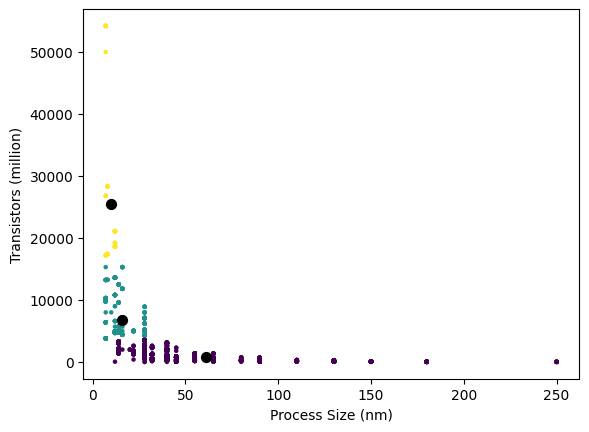

In [49]:
import matplotlib.pyplot as plt

xAxis = 0
yAxis = 3

plt.scatter(df.values[:,xAxis], df.values[:,yAxis], c=assignments, s=5)
plt.scatter(centroids[:,xAxis], centroids[:,yAxis], c='black', s=50)
plt.xlabel(df.columns[xAxis])
plt.ylabel(df.columns[yAxis]);